**EXPLORATORY DATA ANALYSIS**

In [0]:
import pandas as pd

In [0]:
file = 'https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv'
df = pd.read_csv(file,parse_dates=[7]).set_index('date_time')

In [78]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2013-01-01 00:00:00,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,1439
2013-01-01 01:00:00,None,263.78,0.0,0,40,Clouds,scattered clouds,1502
2013-01-01 02:00:00,None,264.16,0.0,0,75,Snow,heavy snow,933
2013-01-01 03:00:00,None,263.95,0.0,0,90,Clouds,overcast clouds,576
2013-01-01 04:00:00,None,263.65,0.0,0,90,Clouds,overcast clouds,372


In [45]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8568,None,248.13,0.0,0,1,Clear,sky is clear,2013-12-31 19:00:00,4504
8569,None,247.66,0.0,0,1,Clear,sky is clear,2013-12-31 20:00:00,3478
8570,None,248.63,0.0,0,1,Clear,sky is clear,2013-12-31 21:00:00,2711
8571,None,248.39,0.0,0,40,Clouds,scattered clouds,2013-12-31 22:00:00,2189
8572,None,249.89,0.0,0,90,Clouds,overcast clouds,2013-12-31 23:00:00,1457


In [42]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,8573.000000,8573.000000,8573.0,8573.000000,8573.000000
mean,278.976352,0.161284,0.0,52.560947,3286.762160
std,13.322459,1.439626,0.0,37.470062,2028.322769
min,244.820000,0.000000,0.0,0.000000,164.000000
25%,269.460000,0.000000,0.0,1.000000,1193.000000
50%,277.330000,0.000000,0.0,64.000000,3344.000000
75%,290.400000,0.000000,0.0,90.000000,5001.000000
max,308.240000,55.630000,0.0,100.000000,7217.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8573 entries, 2013-01-01 00:00:00 to 2013-12-31 23:00:00
Data columns (total 8 columns):
holiday                8573 non-null object
temp                   8573 non-null float64
rain_1h                8573 non-null float64
snow_1h                8573 non-null int64
clouds_all             8573 non-null int64
weather_main           8573 non-null object
weather_description    8573 non-null object
traffic_volume         8573 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 602.8+ KB


In [12]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [0]:
df['temp(deg.C)'] = df['temp'].sub(273.15)

In [44]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,8573,8573.000000,8573.000000,8573.0,8573.000000,8573,8573,8573,8573.000000
unique,11,NaN,NaN,NaN,NaN,10,33,7294,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,8563,NaN,NaN,NaN,NaN,3136,1494,6,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-31 23:00:00,NaN
mean,NaN,278.976352,0.161284,0.0,52.560947,NaN,NaN,NaN,3286.762160
std,NaN,13.322459,1.439626,0.0,37.470062,NaN,NaN,NaN,2028.322769
min,NaN,244.820000,0.000000,0.0,0.000000,NaN,NaN,NaN,164.000000
25%,NaN,269.460000,0.000000,0.0,1.000000,NaN,NaN,NaN,1193.000000


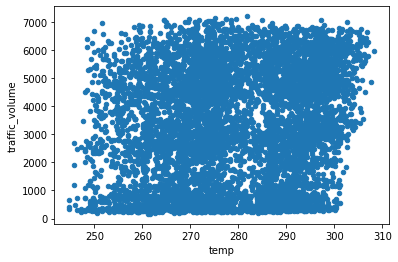

In [17]:
df.plot.scatter('temp','traffic_volume')

In [31]:
print(df['holiday'].unique())
print(df['weather_main'].unique())
print(df['weather_description'].unique())

['New Years Day' 'None' 'Washingtons Birthday' 'Memorial Day'
 'Independence Day' 'State Fair' 'Labor Day' 'Columbus Day' 'Veterans Day'
 'Thanksgiving Day' 'Christmas Day']
['Clouds' 'Snow' 'Clear' 'Mist' 'Haze' 'Fog' 'Rain' 'Drizzle'
 'Thunderstorm' 'Squall']
['broken clouds' 'scattered clouds' 'heavy snow' 'overcast clouds'
 'few clouds' 'sky is clear' 'mist' 'haze' 'fog' 'light rain'
 'moderate rain' 'drizzle' 'light intensity drizzle' 'snow'
 'freezing rain' 'shower snow' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy intensity rain'
 'proximity thunderstorm' 'light rain and snow'
 'light intensity shower rain' 'SQUALLS' 'thunderstorm with heavy rain'
 'thunderstorm with rain' 'heavy intensity drizzle'
 'proximity thunderstorm with drizzle' 'thunderstorm' 'Sky is Clear'
 'very heavy rain' 'thunderstorm with light drizzle' 'light snow'
 'thunderstorm with drizzle']


In [69]:
df.groupby('holiday')['traffic_volume'].mean()

holiday
Christmas Day            712.000000
Columbus Day             615.000000
Independence Day        1060.000000
Labor Day               1041.000000
Memorial Day             863.000000
New Years Day           1439.000000
None                    3289.620694
State Fair               661.000000
Thanksgiving Day         929.000000
Veterans Day             514.000000
Washingtons Birthday     556.000000
Name: traffic_volume, dtype: float64

In [0]:
test = df.groupby('holiday')['traffic_volume'].mean()

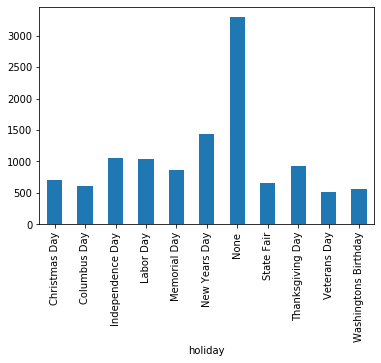

In [76]:
test.plot.bar()

In [0]:
test2 = df.groupby(df.index.hour)['traffic_volume'].mean()

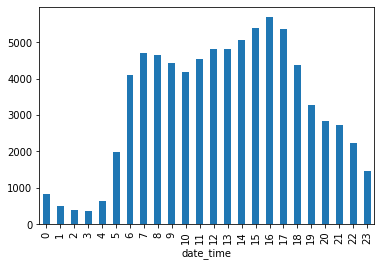

In [86]:
test2.plot.bar()

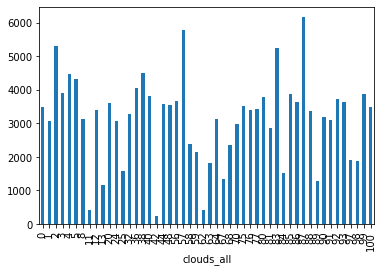

In [89]:
clouds = df.groupby('clouds_all')['traffic_volume'].mean()
clouds.plot.bar()

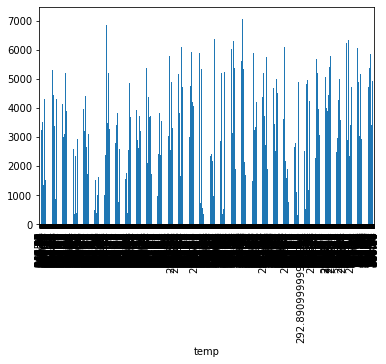

In [90]:
temp = df.groupby('temp')['traffic_volume'].mean()
temp.plot.bar()

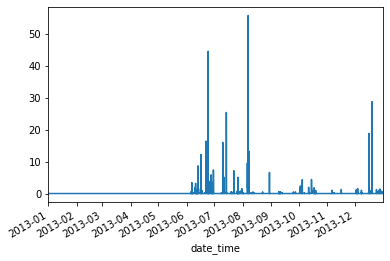

In [92]:
df['rain_1h'].plot()

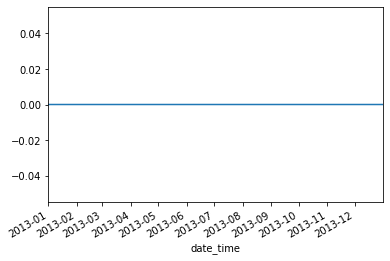

In [93]:
df['snow_1h'].plot()

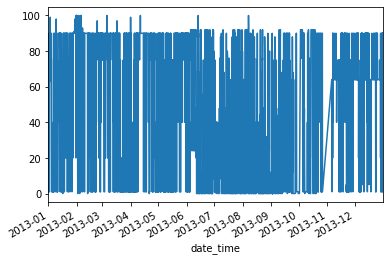

In [94]:
df['clouds_all'].plot()

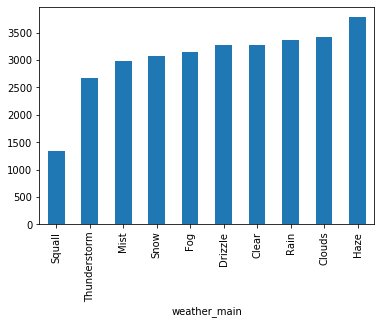

In [108]:
weather = df.groupby('weather_main')['traffic_volume'].mean()
weather.sort_values().plot.bar()

In [0]:
squall = df[df.weather_main == 'Squall']

In [101]:
squall.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2013-05-12 02:00:00,None,284.28,0.00,0,75,Squall,SQUALLS,420
2013-06-22 04:00:00,None,293.51,6.94,0,90,Squall,SQUALLS,400
2013-08-07 20:00:00,None,295.03,5.97,0,64,Squall,SQUALLS,3216


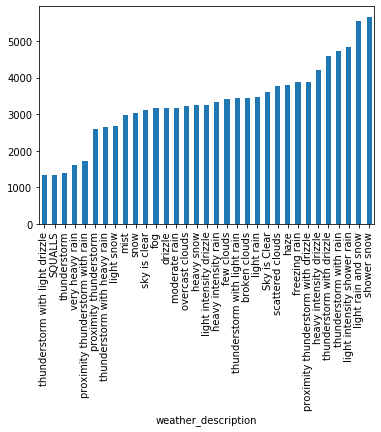

In [109]:
weather_desc = df.groupby('weather_description')['traffic_volume'].mean()
weather_desc.sort_values().plot.bar()